In [35]:
import pandas as pd
import statsmodels.api as sm

In [36]:
datos = pd.read_csv('Data/nacimientos.csv', encoding = 'latin')
print(datos.head())

   COD_DPTO  COD_MUNIC  AREANAC  SIT_PARTO OTRO_SIT  SEXO  PESO_NAC  \
0         8          1        1          1      NaN     2         6   
1        23          1        1          1      NaN     1         5   
2        11          1        1          1      NaN     1         6   
3        52          1        1          1      NaN     2         5   
4        63          1        1          1      NaN     1         7   

   TALLA_NAC   ANO  MES  ...  IDFACTORRH  EDAD_MADRE  EST_CIVM  NIV_EDUM  \
0          5  2017    1  ...           1           4         6         7   
1          5  2017    1  ...           1           5         1         4   
2          5  2017    1  ...           1           4         1         4   
3          4  2017    1  ...           1           6         5         2   
4          5  2017    1  ...           1           4         1         7   

   CODPTORE  CODMUNRE  AREA_RES  FECHA_NACM  N_EMB  SEG_SOCIAL  
0       8.0       1.0       1.0  27/09/2004      2 

In [37]:
datos.columns

Index(['COD_DPTO', 'COD_MUNIC', 'AREANAC', 'SIT_PARTO', 'OTRO_SIT', 'SEXO',
       'PESO_NAC', 'TALLA_NAC', 'ANO', 'MES', 'T_GES', 'NUMCONSUL',
       'TIPO_PARTO', 'MUL_PARTO', 'APGAR1', 'APGAR2', 'IDHEMOCLAS',
       'IDFACTORRH', 'EDAD_MADRE', 'EST_CIVM', 'NIV_EDUM', 'CODPTORE',
       'CODMUNRE', 'AREA_RES', 'FECHA_NACM', 'N_EMB', 'SEG_SOCIAL'],
      dtype='object')

In [38]:
datos=datos.dropna()
datos=datos.drop_duplicates()

In [ ]:
# dejar 'TIPO_PARTO', 'SIT_PARTO', 'SEXO', 'PESO_NAC', 'TALLA_NAC', 'ANO', 'T_GES', 'MUL_PARTO', 'APGAR1', 'APGAR2', 'EDAD_MADRE'

datos= datos.drop(columns=['COD_DPTO', 'COD_MUNIC', 'AREANAC', 'OTRO_SIT',
        'MES', 'NUMCONSUL','IDHEMOCLAS', 'IDFACTORRH', 'EST_CIVM', 'NIV_EDUM',
       'CODPTORE', 'CODMUNRE', 'AREA_RES', 'FECHA_NACM', 'N_EMB', 'SEG_SOCIAL'])
datos.columns

KeyError: "['ULTCURMAD', 'EDAD_PADRE', 'NIV_EDUP'] not found in axis"

In [ ]:
for col in datos.columns:
    print(f"Niveles para la columna {col}: \n{datos[col].value_counts()}")

Niveles para la columna SIT_PARTO: 
3    3253
1       1
Name: SIT_PARTO, dtype: int64
Niveles para la columna SEXO: 
1    1632
2    1621
3       1
Name: SEXO, dtype: int64
Niveles para la columna PESO_NAC: 
6    1157
5     927
7     438
4     339
3     118
9     100
8      76
2      68
1      31
Name: PESO_NAC, dtype: int64
Niveles para la columna TALLA_NAC: 
4    1728
5    1308
9     109
3     102
2       5
6       2
Name: TALLA_NAC, dtype: int64
Niveles para la columna ANO: 
2021    973
2022    851
2017    715
2018    715
Name: ANO, dtype: int64
Niveles para la columna T_GES: 
4    2064
3     916
6     213
2      37
5      17
9       6
1       1
Name: T_GES, dtype: int64
Niveles para la columna TIPO_PARTO: 
1    3226
4      25
9       3
Name: TIPO_PARTO, dtype: int64
Niveles para la columna MUL_PARTO: 
1    3209
2      40
9       3
4       1
3       1
Name: MUL_PARTO, dtype: int64
Niveles para la columna APGAR1: 
99    1797
8      593
9      449
7      180
10      73
6       55
5    

In [ ]:
datos = datos[datos["APGAR1"] != 99]
datos['APGAR1'] = datos['APGAR1'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})

datos = datos[datos["APGAR2"] != 99]
datos['APGAR2'] = datos['APGAR2'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1})


In [ ]:
Sit_parto = datos[['SIT_PARTO', 'APGAR1', 'APGAR2', 'ANO']]
Sexo = datos[['SEXO', 'APGAR1', 'APGAR2', 'ANO']]
Peso_nac = datos[['PESO_NAC', 'APGAR1', 'APGAR2', 'ANO']]
Talla_nac = datos[['TALLA_NAC', 'APGAR1', 'APGAR2', 'ANO']]
T_ges = datos[['T_GES', 'APGAR1', 'APGAR2', 'ANO']]
Tipo_parto = datos[['TIPO_PARTO', 'APGAR1', 'APGAR2', 'ANO']]
Mul_parto = datos[['MUL_PARTO', 'APGAR1', 'APGAR2', 'ANO']]
Edad_madre = datos[['EDAD_MADRE', 'APGAR1', 'APGAR2', 'ANO']]




In [ ]:
Sit_parto= Sit_parto[Sit_parto["SIT_PARTO"] != 9]
Sit_parto['SIT_PARTO'] = Sit_parto['SIT_PARTO'].map({1: 0, 2: 1, 3: 1})

In [ ]:
Sexo= Sexo[Sexo["SEXO"] != 3]
Sexo['SEXO'] = Sexo['SEXO'].map({1: 0, 2: 1})

In [ ]:
Peso_nac= Peso_nac[Peso_nac["PESO_NAC"] != 9]
Peso_nac['PESO_NAC'] = Peso_nac['PESO_NAC'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1, 7: 1, 8: 1})

In [ ]:
Talla_nac= Talla_nac[Talla_nac["TALLA_NAC"] != 9]
Talla_nac['TALLA_NAC'] = Talla_nac['TALLA_NAC'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1})

In [ ]:
T_ges= T_ges[T_ges["T_GES"] != 9]
T_ges['T_GES'] = T_ges['T_GES'].map({1: 0, 2: 0, 3: 0, 4: 1, 5: 1})

In [ ]:
Tipo_parto= Tipo_parto[Tipo_parto["TIPO_PARTO"] != 9]
Tipo_parto['TIPO_PARTO'] = Tipo_parto['TIPO_PARTO'].map({1: 0, 2: 1, 3: 1})

In [ ]:
Mul_parto= Mul_parto[Mul_parto["MUL_PARTO"] != 9]
Mul_parto['MUL_PARTO'] = Mul_parto['MUL_PARTO'].map({1: 0, 2: 1, 3: 1, 4: 1})

In [ ]:
Edad_madre= Edad_madre[Edad_madre["EDAD_MADRE"] != 9]
Edad_madre['EDAD_MADRE'] = Edad_madre['EDAD_MADRE'].map({1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1})

In [ ]:
Sit_parto['SIT_PARTO'].value_counts()

1    1456
0       1
Name: SIT_PARTO, dtype: int64

In [ ]:
def calculate_odds_ratio(df, independent_var, dependent_var, year_col):
    odds_ratios = {}
    
    for year, group in df.groupby(year_col):
        contingency_table = pd.crosstab(group[independent_var], group[dependent_var])
        
        if contingency_table.shape == (2, 2):
            icl, icu = sm.stats.Table2x2(contingency_table.values).oddsratio_confint()[0], sm.stats.Table2x2(contingency_table.values).oddsratio_confint()[1]
            odds_ratio, p_value = sm.stats.Table2x2(contingency_table.values).oddsratio, sm.stats.Table2x2(contingency_table.values).oddsratio_pvalue()
            odds_ratios[year] = {'Odds Ratio': odds_ratio, 'P-value': p_value, 'IC inferior': icl, 'IC superior': icu}
        else:
            odds_ratios[year] = {'Odds Ratio': None, 'P-value': None,'IC inferior': None, 'IC superior': None} 

    return odds_ratios

In [ ]:
def calculate_risk_ratio(df, independent_var, dependent_var, year_col):
    risk_ratios = {}
    
    for year, group in df.groupby(year_col):
        contingency_table = pd.crosstab(group[independent_var], group[dependent_var])
        
        if contingency_table.shape == (2, 2):
            icl, icu = sm.stats.Table2x2(contingency_table.values).riskratio_confint()[0], sm.stats.Table2x2(contingency_table.values).riskratio_confint()[1]
            risk_ratio, p_value = sm.stats.Table2x2(contingency_table.values).riskratio, sm.stats.Table2x2(contingency_table.values).riskratio_pvalue()
            risk_ratios[year] = {'Risk Ratio': risk_ratio, 'P-value': p_value, 'IC inferior': icl, 'IC superior': icu}
        else:
            risk_ratios[year] = {'Risk Ratio': risk_ratio, 'P-value': p_value, 'IC inferior': icl, 'IC superior': icu}

    return risk_ratios

In [ ]:
var_dep=['SEXO', 'PESO_NAC', 'TALLA_NAC', 'T_GES', 'MUL_PARTO', 'EDAD_MADRE']
dfs={'TIPO_PARTO': Tipo_parto , 'SIT_PARTO': Sit_parto, 'SEXO': Sexo, 'PESO_NAC':Peso_nac , 'TALLA_NAC': Talla_nac, 'T_GES': T_ges, 'MUL_PARTO': Mul_parto, 'EDAD_MADRE': Edad_madre}
ano=[2017, 2018, 2021, 2022]

odds_ratio={}
risk_ratio={}

for var in var_dep:
    #Odds ratio
    odds_ratio_var = {}  
    odds_ratio_var_apgar1 = calculate_odds_ratio(dfs[var], var, 'APGAR1', 'ANO')
    odds_ratio_var_apgar2 = calculate_odds_ratio(dfs[var], var, 'APGAR2', 'ANO')

    #Risk ratio
    risk_ratio_var = {}  
    risk_ratio_var_apgar1 = calculate_risk_ratio(dfs[var], var, 'APGAR1', 'ANO')
    risk_ratio_var_apgar2 = calculate_risk_ratio(dfs[var], var, 'APGAR2', 'ANO')
    
    for year in ano:
        #Odds ratio
        odds_ratio_var[year] = {
            'Year': year,
            'Odds Ratio APGAR1': odds_ratio_var_apgar1[year]['Odds Ratio'],
            'P-value APGAR1': odds_ratio_var_apgar1[year]['P-value'],
            'Odds Ratio APGAR2': odds_ratio_var_apgar2[year]['Odds Ratio'],
            'P-value APGAR2': odds_ratio_var_apgar2[year]['P-value'],
            'IC inferior OR APGAR1': odds_ratio_var_apgar1[year]['IC inferior'],
            'IC superior OR APGAR1': odds_ratio_var_apgar1[year]['IC superior'],
            'IC inferior OR APGAR2': odds_ratio_var_apgar2[year]['IC inferior'],
            'IC superior OR APGAR2': odds_ratio_var_apgar2[year]['IC superior']
        }

        #Risk ratio
        risk_ratio_var[year] = {
            'Year': year,
            'Risk Ratio APGAR1': risk_ratio_var_apgar1[year]['Risk Ratio'],
            'P-value APGAR1': risk_ratio_var_apgar1[year]['P-value'],
            'Risk Ratio APGAR2': risk_ratio_var_apgar2[year]['Risk Ratio'],
            'P-value APGAR2': risk_ratio_var_apgar2[year]['P-value'],
            'IC inferior RR APGAR1': risk_ratio_var_apgar1[year]['IC inferior'],
            'IC superior RR APGAR1': risk_ratio_var_apgar1[year]['IC superior'],
            'IC inferior RR APGAR2': risk_ratio_var_apgar2[year]['IC inferior'],
            'IC superior RR APGAR2': risk_ratio_var_apgar2[year]['IC superior']
        }
    
    odds_ratio[var] = odds_ratio_var
    risk_ratio[var] = risk_ratio_var

results = []

for var in var_dep:
    for year, result in odds_ratio[var].items():
        
        results.append({
            'Variable': var,
            'Year': result['Year'],
            'Odds Ratio APGAR1': result['Odds Ratio APGAR1'],
            'P-value APGAR1': result['P-value APGAR1'],
            'Odds Ratio APGAR2': result['Odds Ratio APGAR2'],
            'P-value APGAR2': result['P-value APGAR2'],
            'IC inferior OR APGAR1': result['IC inferior OR APGAR1'],
            'IC superior OR APGAR1': result['IC superior OR APGAR1'],
            'IC inferior OR APGAR2': result['IC inferior OR APGAR2'],
            'IC superior OR APGAR2': result['IC superior OR APGAR2'],


            'Risk Ratio APGAR1': risk_ratio[var][year]['Risk Ratio APGAR1'],
            'P-value Risk Ratio APGAR1': risk_ratio[var][year]['P-value APGAR1'],
            'Risk Ratio APGAR2': risk_ratio[var][year]['Risk Ratio APGAR2'],
            'P-value Risk Ratio APGAR2': risk_ratio[var][year]['P-value APGAR2'],
            'IC inferior RR APGAR1': risk_ratio[var][year]['IC inferior RR APGAR1'],
            'IC superior RR APGAR1': risk_ratio[var][year]['IC superior RR APGAR1'],
            'IC inferior RR APGAR2': risk_ratio[var][year]['IC inferior RR APGAR2'],
            'IC superior RR APGAR2': risk_ratio[var][year]['IC superior RR APGAR2'],
            
        })

ratios_df = pd.DataFrame(results)
ratios_df = ratios_df.fillna(0)
print(ratios_df)


      Variable  Year  Odds Ratio APGAR1  P-value APGAR1  Odds Ratio APGAR2  \
0         SEXO  2017           1.811518        0.405877           1.501736   
1         SEXO  2018           1.295019        0.638782           0.961111   
2         SEXO  2021           2.136546        0.219786           4.252964   
3         SEXO  2022           1.546875        0.636858           8.505263   
4     PESO_NAC  2017          12.000000        0.000586          18.057692   
5     PESO_NAC  2018           8.664407        0.000177           4.348485   
6     PESO_NAC  2021           9.658228        0.000383          54.320988   
7     PESO_NAC  2022           2.583333        0.307451          12.076923   
8    TALLA_NAC  2017          10.085714        0.007443          23.666667   
9    TALLA_NAC  2018          18.500000        0.000006          26.153846   
10   TALLA_NAC  2021          18.900000        0.000086          30.848485   
11   TALLA_NAC  2022          11.151515        0.012380         

In [ ]:
# Save the DataFrame to a CSV file
ratios_df.to_csv('Data/odds_risk_ratio.csv', index=False)


CSV file saved successfully!


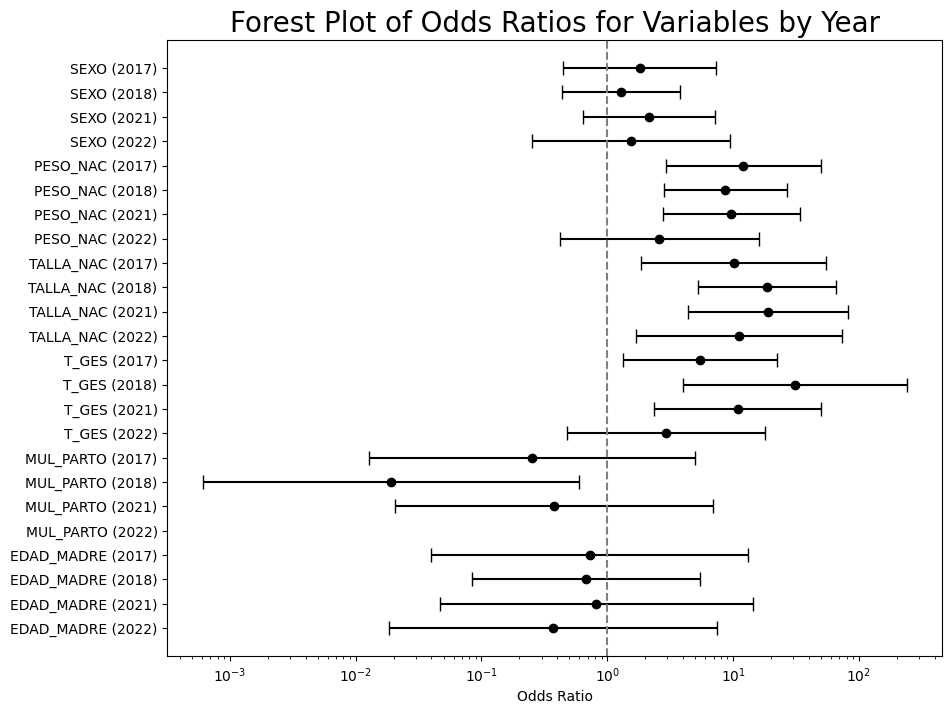

In [ ]:
import matplotlib.pyplot as plt

# Calculate error bars for confidence intervals
ci_lower_errors = ratios_df["Odds Ratio APGAR1"] - ratios_df["IC inferior OR APGAR1"]
ci_upper_errors = ratios_df["IC superior OR APGAR1"] - ratios_df["Odds Ratio APGAR1"]

# Plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.errorbar(ratios_df["Odds Ratio APGAR1"], ratios_df.index, xerr=[ci_lower_errors, ci_upper_errors], 
            fmt='o', color='black', capsize=5, label="APGAR1 Odds Ratio")
ax.axvline(x=1, color='grey', linestyle='--')

# Set labels
ax.set_yticks(ratios_df.index)
ax.set_yticklabels(ratios_df["Variable"] + " (" + ratios_df["Year"].astype(str) + ")")
ax.set_xscale("log")
ax.set_xlabel("Odds Ratio")
ax.set_title("Forest Plot of Odds Ratios for Variables by Year", fontsize=20)
plt.gca().invert_yaxis()

plt.show()